In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c
from matplotlib import cm

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


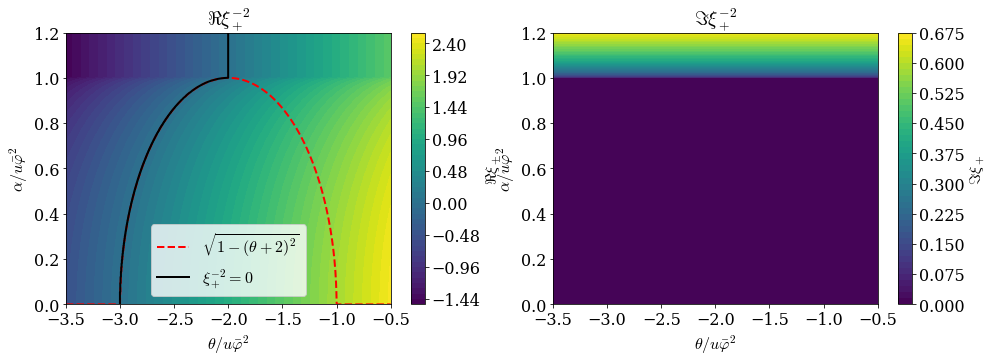

In [99]:
r0 = np.linspace(-3.5, -.5, 1000)
s0 = np.linspace(0, 1.2, 1000)
r, s = np.meshgrid(r0, s0)
l1 = lambda r, s: r + 2 + np.sqrt(1 - s**2 + 0j)
l2 = lambda r, s: r + 2 - np.sqrt(1 - s**2 + 0j)


fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(r0, np.sqrt(1 - (r0 + 2)**2 + 0j), 'r--', label='$\\sqrt{1 - (\\theta + 2)^2}$')

L = l1(r, s)

si = ax[0].contourf(r, s, L.real, levels=50)
cbar = fig.colorbar(si, ax=ax[0], label='$\\Re \\xi_+$')
si = ax[1].contourf(r, s, L.imag, levels=50)
cbar = fig.colorbar(si, ax=ax[1], label='$\\Im\\xi_+$')


k = np.array(L < 0, dtype=int)
a = (k[:, :-1] - k[:, 1:]) != 0 
r1, s1 = r[:, :-1][a], s[:, :-1][a]
ax[0].plot(r1, s1, "k-", label='$\\xi_+^{-2} = 0$')

ax[0].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[0].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
ax[0].legend()

ax[1].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[1].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
# ax[1].legend()

ax[0].set_title("$\\Re \\xi_+^{-2} $")
ax[1].set_title("$\\Im \\xi_+^{-2} $")

plt.show()
fig.savefig('l1.pdf',bbox_inches='tight')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


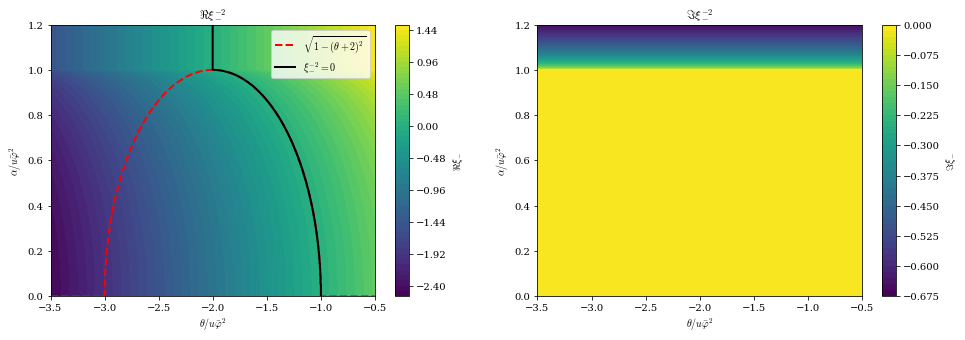

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(r0, np.sqrt(1 - (r0 + 2)**2 + 0j), 'r--', label='$\\sqrt{1 - (\\theta + 2)^2}$')

L = l2(r, s)

si = ax[0].contourf(r, s, L.real, levels=50)
cbar = fig.colorbar(si, ax=ax[0], label='$\\Re \\xi_-$')
si = ax[1].contourf(r, s, L.imag, levels=50)
cbar = fig.colorbar(si, ax=ax[1], label='$\\Im\\xi_-$')


k = np.array(L < 0, dtype=int)
a = (k[:, :-1] - k[:, 1:]) != 0 
r1, s1 = r[:, :-1][a], s[:, :-1][a]
ax[0].plot(r1, s1, "k-", label='$\\xi_-^{-2} = 0$')

ax[0].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[0].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
ax[0].legend()

ax[1].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[1].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
# ax[1].legend()

ax[0].set_title("$\\Re \\xi_-^{-2} $")
ax[1].set_title("$\\Im \\xi_-^{-2} $")

plt.show()
fig.savefig('l2.pdf',bbox_inches='tight')

/tmp/ipykernel_592755/3253696420.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(r, s, np.ma.masked_where(m, one), color='green', alpha=.6)
/tmp/ipykernel_592755/3253696420.py:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(r, s, np.ma.masked_where(m, one), color='blue', alpha=.6)


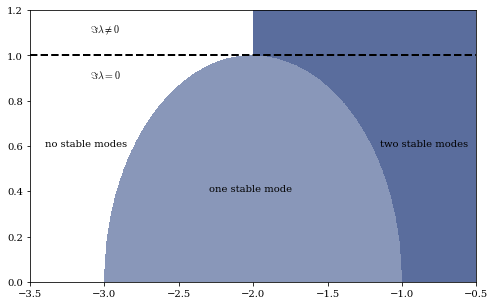

In [81]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 5))

L = l2(r, s).real
m = L<0
one = np.ones_like(r)
ax.contourf(r, s, np.ma.masked_where(m, one), color='green', alpha=.6)

L = l1(r, s).real
m = L<0
one = np.ones_like(r)
ax.contourf(r, s, np.ma.masked_where(m, one), color='blue', alpha=.6)

ax.plot([-3.5, -.5], [1, 1], 'k--')

ax.text(-1.15, .6, 'two stable modes')
ax.text(-2.3, .4, 'one stable mode')
ax.text(-3.4, .6, 'no stable modes')
ax.text(-3.1, 1.1, '$\\Im \\lambda \\neq 0 $')
ax.text(-3.1, .9, '$\\Im \\lambda = 0 $')

plt.show()
fig.savefig('l3.pdf')

In [5]:
np.sum(c)

<module 'matplotlib.colors' from '/usr/lib/python3/dist-packages/matplotlib/colors.py'>

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


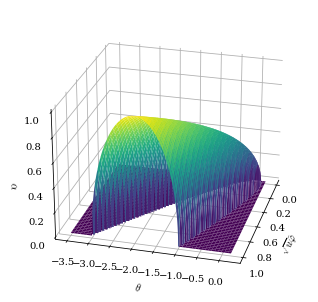

In [94]:
# %matplotlib

x, y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1.5, 100))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


r0 = np.linspace(-3.5, .2, 1000)
x0 = np.linspace(0, 1, 1000)
r, x = np.meshgrid(r0, x0)
a = np.sqrt(x - (r0 + 2*x)**2 + 0j)

ax.plot_surface(x, r, a,cmap=cm.viridis)

ax.azim=15
ax.elev=25

plt.xlabel("$\\sqrt{u}\\bar\\varphi$")
ax.set_ylabel("$\\theta$")
ax.set_zlabel("$\\alpha$")
ax.zaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


plt.subplots_adjust(top=1, bottom=0, right=0.8, left=0, hspace=0, wspace=1)
save_opt = dict(
    bbox_inches='tight',
    pad_inches = 0, 
    transparent=True, 
    dpi=300
)

plt.savefig("surf.pdf", **save_opt)


plt.show()